In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

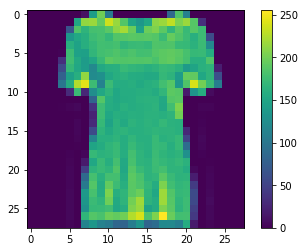

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#re-shape for Conv layers
train_images_shaped = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_shaped = test_images.reshape((test_images.shape[0], 28, 28, 1))

# it's from 0 to 255 , I need 0 to 1. This one for plt.
train_images = train_images / 255.0
test_images = test_images / 255.0

#This one for conv layers
train_images_shaped = train_images_shaped / 255.0
test_images_shaped = test_images_shaped / 255.0

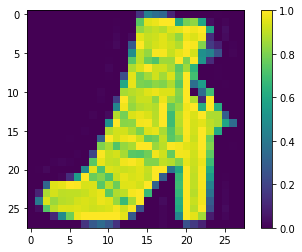

In [11]:
plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.grid(False)
plt.show()

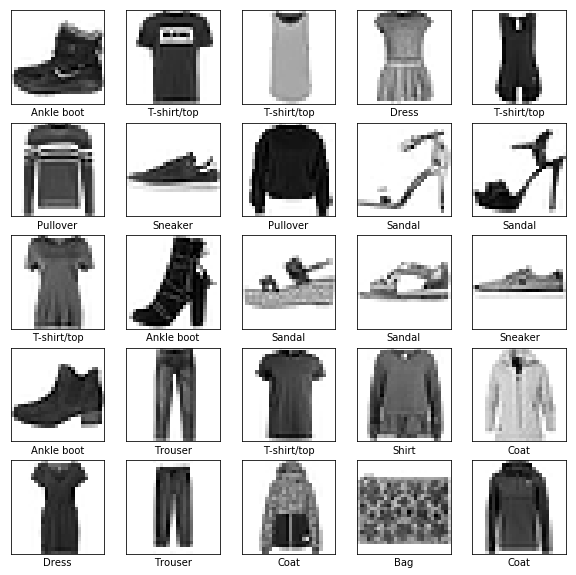

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5, input_shape=(13, 13)),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images_shaped, train_labels, epochs=10, batch_size = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.5163 - accuracy: 0.8109
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.3777 - accuracy: 0.8622
Epoch 3/10
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.3428 - accuracy: 0.8752
Epoch 4/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.3271 - accuracy: 0.8807
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.3138 - accuracy: 0.8836
Epoch 6/10
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.3050 - accuracy: 0.8890
Epoch 7/10
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.3004 - accuracy: 0.8900
Epoch 8/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.2938 - accuracy: 0.8921
Epoch 9/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.2879 - accuracy: 0.8937
Epoch 10

In [17]:
test_loss, test_acc = model.evaluate(test_images_shaped,  test_labels, verbose=2)

print('\nAccuracy on test data:', test_acc)

10000/1 - 3s - loss: 0.2317 - accuracy: 0.9028

Accuracy on test data: 0.9028


In [18]:
#Save predict
predictions = model.predict(test_images_shaped)

In [19]:
np.argmax(predictions[0])

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [91]:
def figure(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()

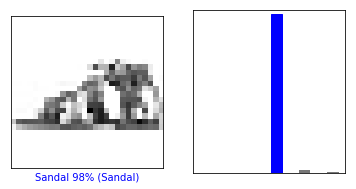

In [105]:
figure(11)

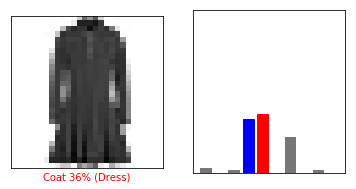

In [106]:
figure(29)

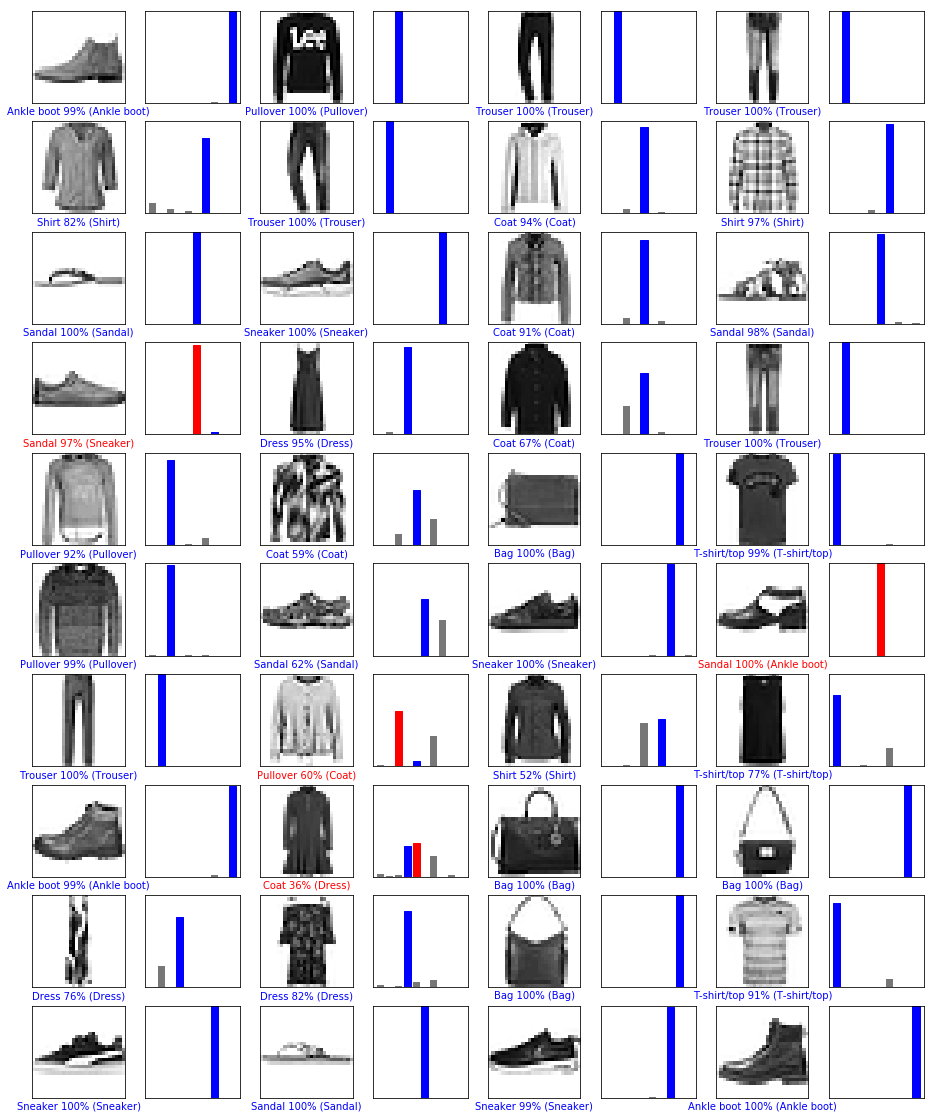

In [92]:
num_rows = 10
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [41]:
def create_true_list(predictions, test_labels):
    true_list = [0]*10
    for i in range(len(predictions)):
        predicted_label = np.argmax(predictions[i])
        if predicted_label == test_labels[i]:
            true_list[test_labels[i]] += 1
    return true_list

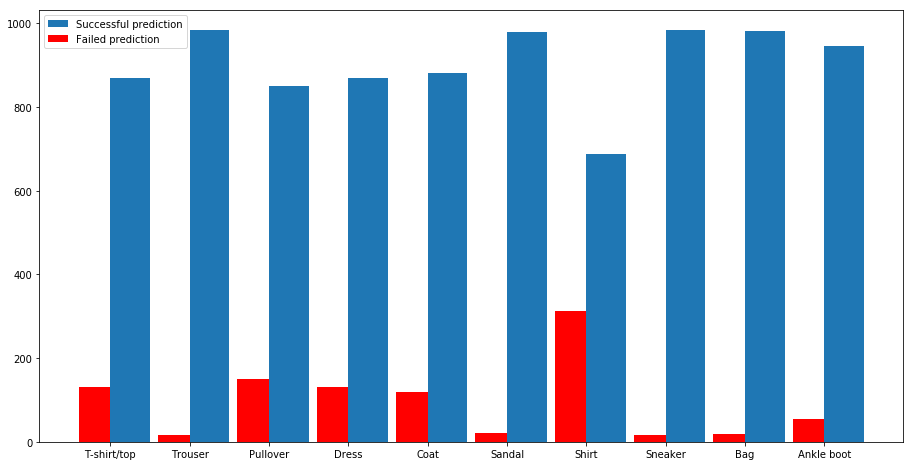

In [86]:
#That's how the ratio between successful prediction and failed one looks like.
true_list = create_true_list(predictions,test_labels)
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 1.5])
# axes.set_ylim(0, 1200)
axes.bar(x = class_names, height = true_list, 
         width = 0.5, align = 'edge', label = 'Successful prediction')
axes.bar(x = class_names, height = [1000-i for i in true_list],
         width = -0.4, align = 'edge', label = "Failed prediction" , color = 'red')
axes.legend(loc = 2)